<a href="https://colab.research.google.com/github/sudhatisaipavan/23CSBTB27-28/blob/main/lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task # 1: Explore and understand about the data set. Some of them include, pair pot of features, correlation between features with parameters, mean radius, mean texture, mean perimeter, mean area, mean smoothness.

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('Breast_cancer_data.csv')

In [ ]:
# Display the first few rows of the dataset
print(data.head())

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  


In [ ]:
# Generate descriptive statistics of the dataset
data_description = data.describe()
print(data_description)

       mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness   diagnosis  
count       569.000000  569.000000  
mean          0.096360    0.627417  
std           0.014064    0.483918  
min           0.052630    0.000000  
25%           0.086370    0.000000  
50%           0.095870    1.000000  
75%           0.105300    1.000000  
max           0.163400    1.000000  


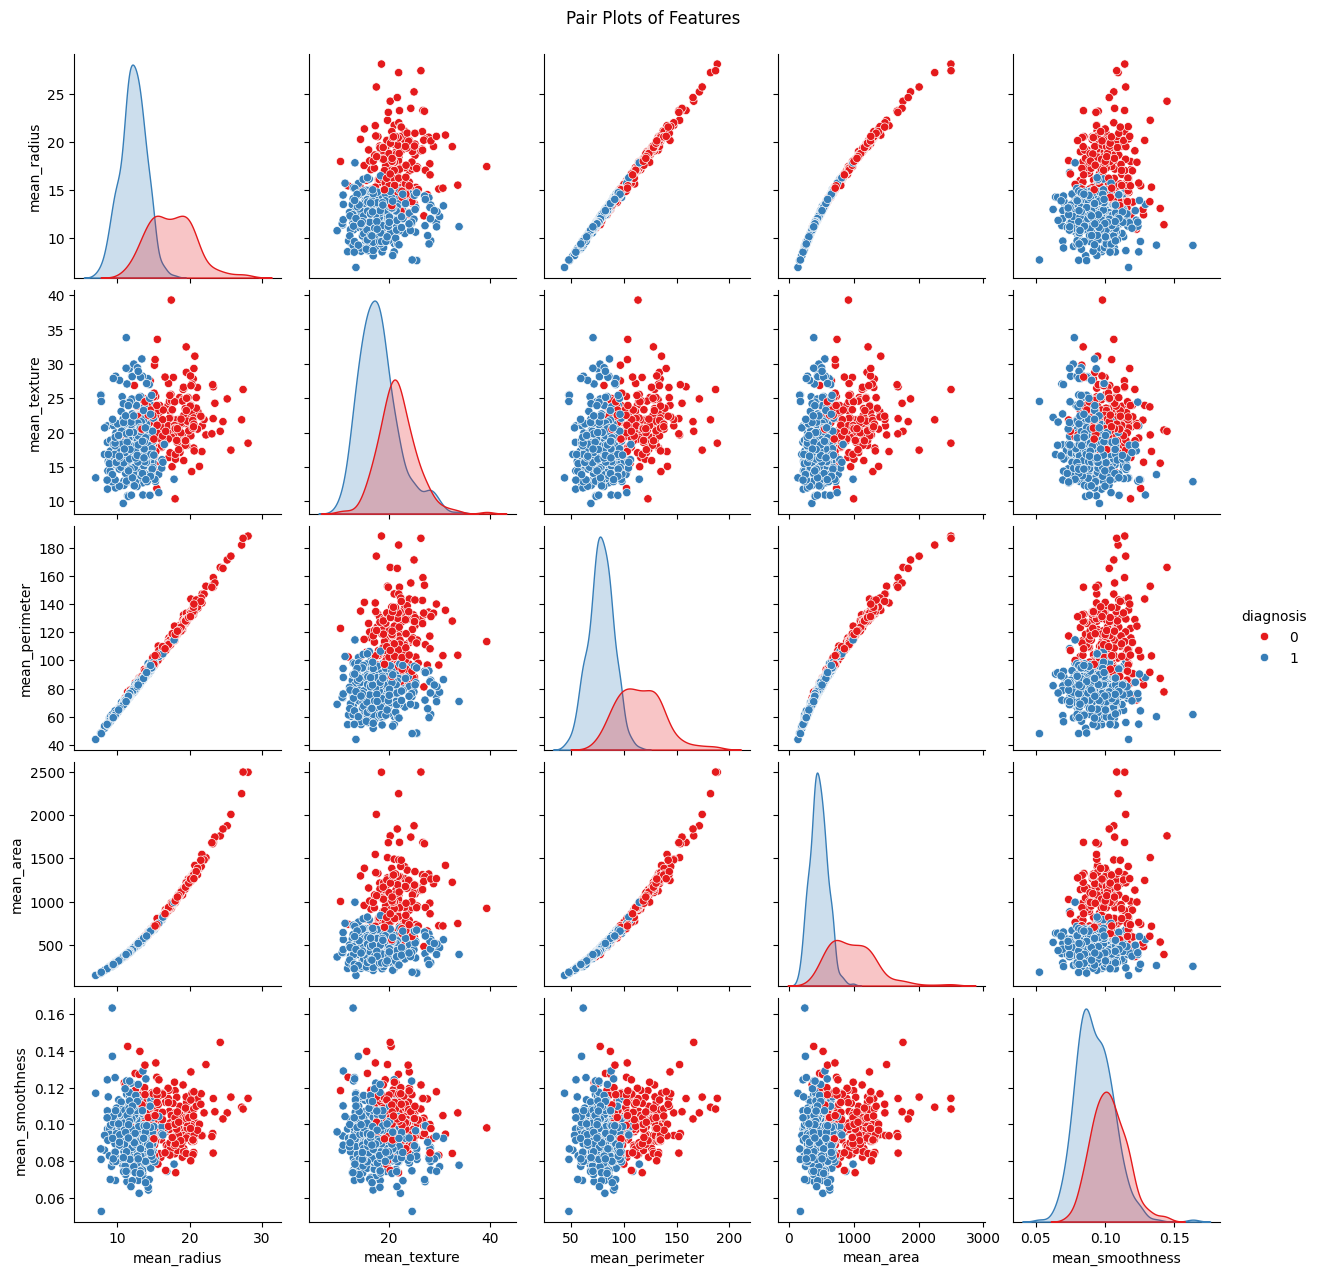

In [ ]:
# Create pair plots to visualize the relationships between features
# The pair plots will help understand the distribution of individual features
# as well as the relationships between two features.
cols = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']
sns.pairplot(data[cols], hue='diagnosis', palette='Set1')
plt.suptitle("Pair Plots of Features", y=1.02)
plt.show()

In [ ]:
# Compute the correlation matrix to quantify the relationships between features
# Correlation coefficients range between -1 and 1
# Values close to 1 indicate a strong positive correlation,
# values close to -1 indicate a strong negative correlation,
# and values close to 0 indicate a weak or no correlation.
correlation_matrix = data[cols].corr()
print(correlation_matrix)

                 mean_radius  mean_texture  mean_perimeter  mean_area  \
mean_radius         1.000000      0.323782        0.997855   0.987357   
mean_texture        0.323782      1.000000        0.329533   0.321086   
mean_perimeter      0.997855      0.329533        1.000000   0.986507   
mean_area           0.987357      0.321086        0.986507   1.000000   
mean_smoothness     0.170581     -0.023389        0.207278   0.177028   
diagnosis          -0.730029     -0.415185       -0.742636  -0.708984   

                 mean_smoothness  diagnosis  
mean_radius             0.170581  -0.730029  
mean_texture           -0.023389  -0.415185  
mean_perimeter          0.207278  -0.742636  
mean_area               0.177028  -0.708984  
mean_smoothness         1.000000  -0.358560  
diagnosis              -0.358560   1.000000  


Task #2: Handling of Missing/Categorical Data and splitting them in to training and testing data set.

In [ ]:
# Task #2: Handling of Missing/Categorical Data and splitting the dataset

# 1. Handling Missing Data
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values for each column:")
print(missing_values)

Missing values for each column:
mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


In [ ]:
# 2. Handling Categorical Data
# Identify categorical columns in the dataset
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical columns in the dataset:")
print(categorical_columns)


Categorical columns in the dataset:
Index([], dtype='object')


In [ ]:
# 3. Splitting the Data
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training and testing data
print("\nShapes of the training and testing data:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of the training and testing data:
X_train: (398, 5)
X_test: (171, 5)
y_train: (398,)
y_test: (171,)


Task #3: Use support vector machine to model the data.

In [ ]:
# Import the necessary library for the SVM classifier
from sklearn.svm import SVC

In [ ]:
# Initialize the SVM classifier with a linear kernel
# The random_state ensures reproducibility of results
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier using the training data
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Now we will Evaluate the Model
# After training, we'll use the model to predict the labels for the testing data
y_pred = svm_classifier.predict(X_test)

In [ ]:
# Import necessary libraries for model evaluation
from sklearn.metrics import classification_report, accuracy_score

# Calculate the accuracy of the model
# Accuracy is the ratio of correctly predicted samples to the total samples
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
# The report provides detailed performance metrics like precision, recall, and F1-score
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:")
print(class_report)

Accuracy: 92.98%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        63
           1       0.94      0.95      0.94       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



Task 4: Evaluate the model

In [ ]:
# Import necessary libraries for the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

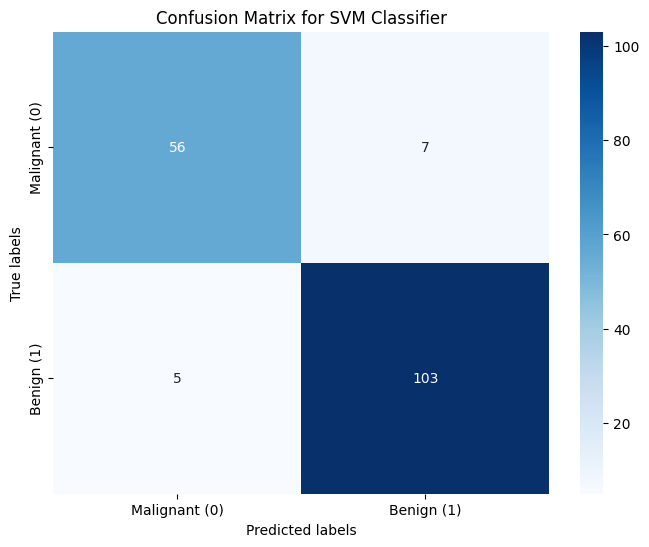

In [ ]:
# Calculate the confusion matrix using the true labels and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
# This provides a clear representation of the model's predictions compared to the actual values
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Malignant (0)', 'Benign (1)'],
            yticklabels=['Malignant (0)', 'Benign (1)'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

Task # 5: Use data normalization, SVM parameter optimization for the improvement in model

In [ ]:
# 1. Data Normalization
# Import necessary libraries for data normalization
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialize the standard scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
# This standardizes the features by removing the mean and scaling to unit variance
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [ ]:
# 2. SVM Hyperparameter Tuning using Randomized Search
# Import necessary libraries for randomized search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

In [ ]:
# Define the hyperparameters and their distributions
# This will be the search space for the randomized search
param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

In [ ]:
# Initialize the RandomizedSearchCV
# It will perform a random search on the hyperparameters using cross-validation
random_search = RandomizedSearchCV(
    SVC(),                            # SVM classifier
    param_distributions=param_dist,   # Hyperparameter distribution
    n_iter=20,                        # Number of parameter settings sampled
    cv=5,                             # 5-fold cross-validation
    n_jobs=-1,                        # Use all available cores
    verbose=1,                        # Print updates while running
    random_state=42                   # Seed for reproducibility
)

In [ ]:
# Fit the randomized search to the normalized training data
random_search.fit(X_train_normalized, y_train)

# Extract the best hyperparameters from the randomized search
best_params_random = random_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# 3. Train and Evaluate SVM with Optimal Hyperparameters
# Initialize an SVM classifier with the best hyperparameters
optimized_svm_classifier = SVC(**best_params_random)

# Train the classifier on the normalized training data
optimized_svm_classifier.fit(X_train_normalized, y_train)

# Predict the labels for the normalized testing data
y_pred_optimized = optimized_svm_classifier.predict(X_test_normalized)

# Evaluate the optimized model's performance using accuracy and a classification report
from sklearn.metrics import classification_report, accuracy_score
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
class_report_optimized = classification_report(y_test, y_pred_optimized)

print(f"Optimized Model Accuracy: {accuracy_optimized*100:.2f}%")
print("\nOptimized Model Classification Report:")
print(class_report_optimized)

Optimized Model Accuracy: 94.74%

Optimized Model Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

